# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [79]:
# Importing naumpy and pandas libraries to read the data

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy, matplotlib,seaborn,statsmodels and pandas package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

Bigmart_Sales_df = pd.read_csv("CM_Tableau_ViZ.csv")

print(Bigmart_Sales_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8523 non-null   int64  
 1   Item_Identifier            8523 non-null   object 
 2   Item_Weight                8523 non-null   float64
 3   Item_Fat_Content           8523 non-null   object 
 4   Item_Visibility            8523 non-null   float64
 5   Item_Type                  8523 non-null   object 
 6   Item_MRP                   8523 non-null   float64
 7   Outlet_Identifier          8523 non-null   object 
 8   Outlet_Establishment_Year  8523 non-null   int64  
 9   Outlet_Size                8523 non-null   object 
 10  Outlet_Location_Type       8523 non-null   object 
 11  Outlet_Type                8523 non-null   object 
 12  Item_Outlet_Sales          8523 non-null   float64
 13  Item_Category              8523 non-null   objec

In [80]:
# Shape of our dataset
Bigmart_Sales_df.shape

(8523, 15)

In [81]:
# Describe our dataset
Bigmart_Sales_df.describe()

,Unnamed: 0,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,4261.000000,12.857645,0.070213,140.992782,1997.831867,2181.288914,25.168133
std,2460.522505,4.226124,0.048742,62.275067,8.371760,1706.499616,8.371760
min,0.000000,4.555000,0.003575,31.290000,1985.000000,33.290000,14.000000
25%,2130.500000,9.310000,0.033085,93.826500,1987.000000,834.247400,19.000000
50%,4261.000000,12.857645,0.062517,143.012800,1999.000000,1794.331000,24.000000
75%,6391.500000,16.000000,0.094585,185.643700,2004.000000,3101.296400,36.000000
max,8522.000000,21.350000,0.328391,266.888400,2009.000000,13086.964800,38.000000


# Visualizing Data

Import the necessary libraries to make the same pairplots as the author. Pairplots are used by analysts to see any relationships that may exist between the x- and y-variables.

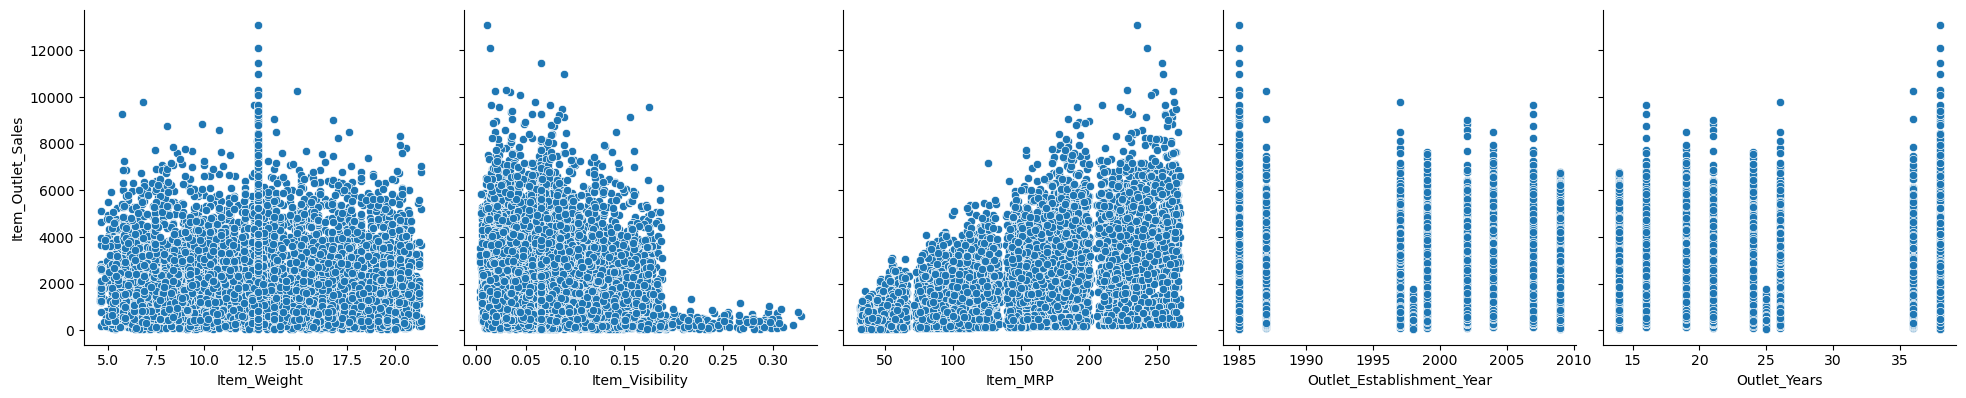

In [82]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(Bigmart_Sales_df, x_vars=['Item_Weight', 'Item_Visibility','Item_MRP','Outlet_Establishment_Year','Outlet_Years'], 
             y_vars='Item_Outlet_Sales', size=4, aspect=1, kind='scatter')
plt.show()

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

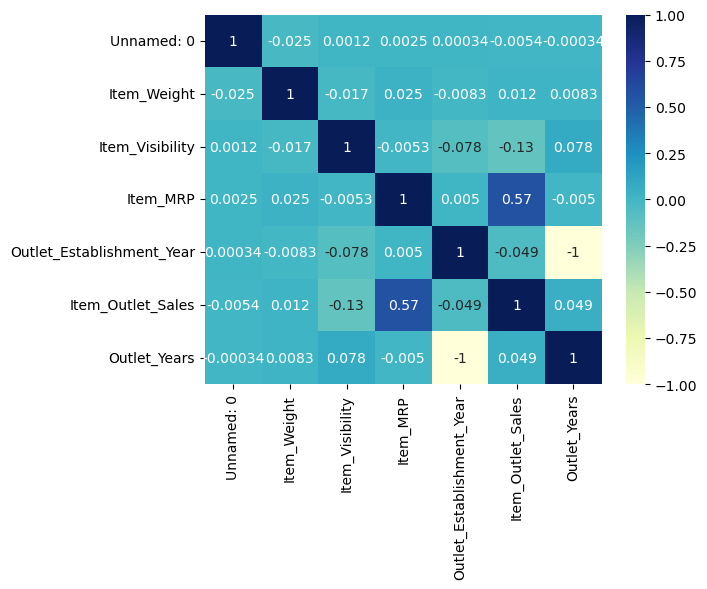

In [83]:
sb.heatmap(Bigmart_Sales_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Time for Linear Regression

Follow the four steps to perform linear regression.

In [84]:
# Step 1 is to assign your x and y
X = Bigmart_Sales_df['Item_MRP']
y = Bigmart_Sales_df['Item_Outlet_Sales']

In [85]:
# Step 2 is to create your train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
X_train
y_train

4122    1549.9824
6590    3691.1952
5460    2996.1000
4541    2105.2596
4186    1619.2256
          ...    
350     1869.5664
79      5305.0944
8039    8994.9580
6936    3751.1172
5640     444.7544
Name: Item_Outlet_Sales, Length: 5966, dtype: float64

In [86]:
# Step 3 is to build the model. Remember to import any libraries you may need
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const      -21.538537
Item_MRP    15.640008
dtype: float64

In [87]:
# Step 4 is to perform residual analysis
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     2867.
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:32:08   Log-Likelihood:                -51727.
No. Observations:                5966   AIC:                         1.035e+05
Df Residuals:                    5964   BIC:                         1.035e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.5385     45.009     -0.479      0.632    -109.773      66.696
Item_MRP      15.6400      0.292     53.549      0.000      15.067      16.213
==============================================================================
Omnibus:                      523.282   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1121.841
Skew:                           0.563   Prob(JB):                    2.48e-244
Kurtosis:                       4.802   Cond. No.                         380.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

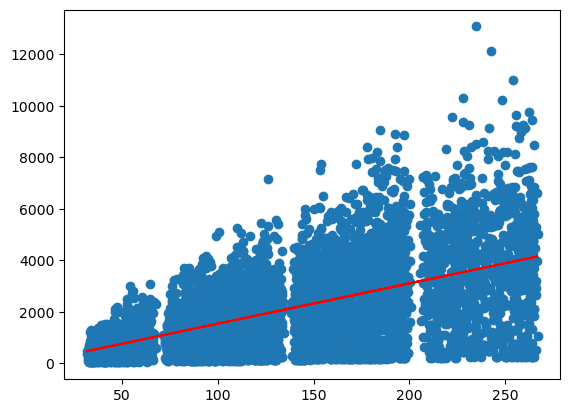

In [88]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, -21.538 + 15.640*X_train, 'r')
plt.show()

In [89]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)
res

4122    -420.471802
6590    1286.971634
5460     691.891157
4541     177.446316
4186     315.705129
           ...     
350      263.530639
79      1846.017987
8039    4979.829257
6936     511.786026
5640   -2981.972221
Length: 5966, dtype: float64

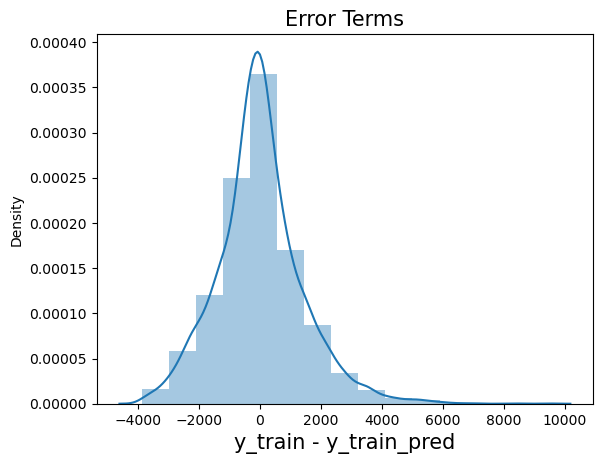

In [90]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

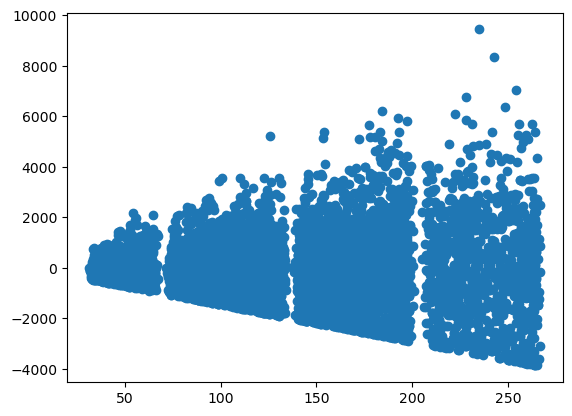

In [91]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

## Evaluate Your Model

Use your model to make some predictions on the test data.

In [92]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

3454    2848.818944
3386    3987.017393
235     2995.178138
7201    1669.584241
7782    2798.852246
           ...     
7168    1730.993168
1325    2234.979912
2079    2713.983307
6552    1908.551050
7125    1211.366417
Length: 2557, dtype: float64

In [93]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.3159353264014223

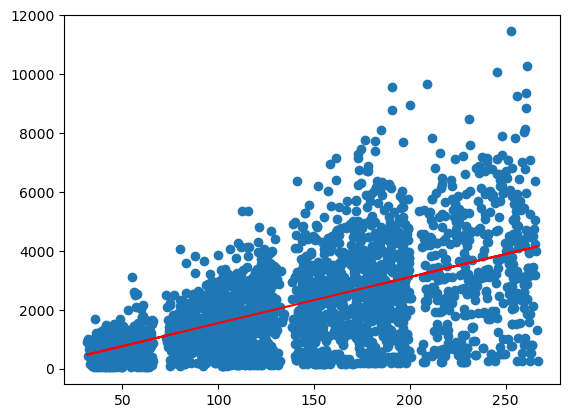

In [94]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [95]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)
X_train_lm

4122    127.3652
6590    155.0998
5460    148.7050
4541    124.6388
4186     84.7224
          ...   
350     104.0648
79      222.5456
8039    258.0988
6936    208.4954
5640    220.4772
Name: Item_MRP, Length: 5966, dtype: float64

In [96]:
# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(5966, 1)
(2557, 1)


In [97]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [98]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : -21.538537090176305
Slope : [15.64000794]


In [99]:
# Item Outlet Sales = -21.538 + 15.640 * Item_MRP

# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.3246863803418407
0.3159353264014223


## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [100]:
X = Bigmart_Sales_df['Item_MRP']
y = Bigmart_Sales_df['Item_Outlet_Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     2867.
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:32:09   Log-Likelihood:                -51727.
No. Observations:                5966   AIC:                         1.035e+05
Df Residuals:                    5964   BIC:                         1.035e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.5385     45.009     -0.479      0.632    -109.773      66.696
Item_MRP      15.6400      0.292     53.549      0.000      15.067      16.213
==============================================================================
Omnibus:                      523.282   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1121.841
Skew:                           0.563   Prob(JB):                    2.48e-244
Kurtosis:                       4.802   Cond. No.                         380.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

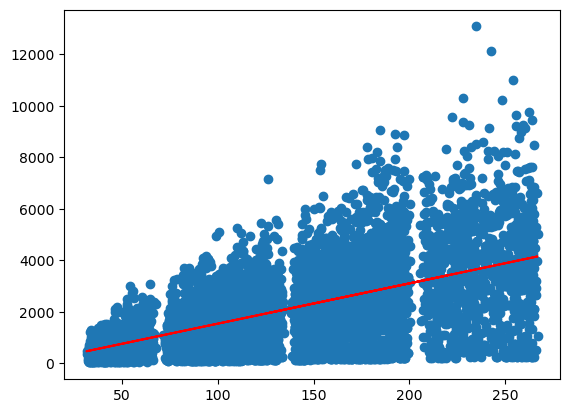

In [101]:
plt.scatter(X_train, y_train)
plt.plot(X_train, -21.5385 + 15.6400*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

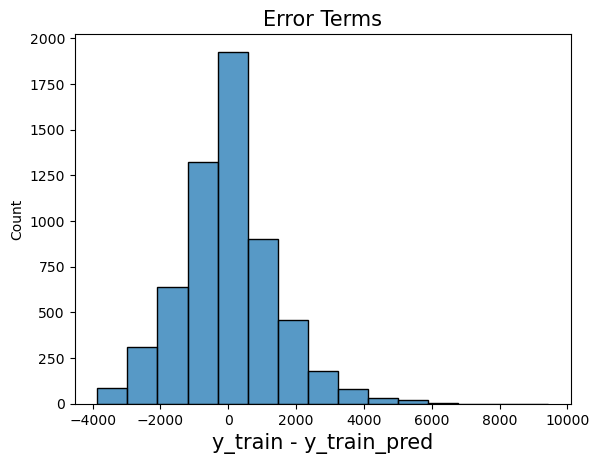

In [102]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

fig = plt.figure()
sb.histplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 

   0.325
   
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset?
   
   Yes
   
3. Was your plot of the error terms a bell curve? 

   Yes, Mostly